<a href="https://colab.research.google.com/github/Prakhi20/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering Assignment:

## Theory Question:

Question 1: What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.
- let’s carefully compare **K-Means** and **Hierarchical Clustering**, and see when to use each.

## **K-Means Clustering**

* **Type**: Partitioning-based clustering.
* **How it works**:

  1. Choose $k$ (number of clusters).
  2. Randomly initialize $k$ centroids.
  3. Assign each point to the nearest centroid (based on distance).
  4. Update centroids = mean of assigned points.
  5. Repeat until convergence.
* **Output**: Flat partition (each data point belongs to exactly one cluster).
* **Strengths**:

  * Fast, efficient for large datasets.
  * Works well when clusters are spherical and balanced.
* **Weaknesses**:

  * Need to predefine $k$.
  * Sensitive to initialization and outliers.

 **Use Case Example**:
Customer segmentation in marketing (group customers into $k$ segments based on purchase behavior).

## **Hierarchical Clustering**

* **Type**: Hierarchy-based clustering.
* **How it works**:

  * **Agglomerative (bottom-up)**: Start with each point as its own cluster → iteratively merge the two closest clusters.
  * **Divisive (top-down)**: Start with one cluster → iteratively split into smaller clusters.
* **Output**: A dendrogram (tree-like structure) showing cluster relationships at different levels.
* **Strengths**:

  * No need to predefine number of clusters.
  * Dendrogram helps visualize cluster hierarchy.
  * Works well for smaller datasets where interpretability is important.
* **Weaknesses**:

  * Computationally expensive (not great for very large datasets).
  * Sensitive to noise and choice of linkage (single, complete, average).

 **Use Case Example**:
   Document clustering in text mining (e.g., organizing research papers into a hierarchy of topics and subtopics).

## **Summary Table**

| Aspect            | K-Means                     | Hierarchical Clustering            |
| ----------------- | --------------------------- | ---------------------------------- |
| Cluster type      | Flat (non-overlapping)      | Hierarchical (tree-like)           |
| Input requirement | Must specify $k$ in advance | No need to specify $k$             |
| Scalability       | Efficient on large datasets | Slower, expensive for large data   |
| Interpretability  | Simple cluster assignment   | Dendrogram shows cluster hierarchy |
| Use case example  | Customer segmentation       | Document/topic hierarchy           |


Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.
 - The **Silhouette Score** is a metric used to evaluate the quality of clustering in unsupervised learning. It measures how well each data point fits within its assigned cluster compared to other clusters. Here's a detailed explanation:

### **Purpose**

 The main purpose of the Silhouette Score is to **quantify the cohesion and separation of clusters**:

   1. **Cohesion**: How close a point is to other points in the same cluster.
   2. **Separation**: How far a point is from points in other clusters.

 By combining these two aspects, the Silhouette Score provides a single value indicating how appropriate the clustering is.

### **How It Works**

 For each data point $i$:

  1. Compute **a(i)**: the average distance between $i$ and all other points in the same cluster (intra-cluster distance).
  2. Compute **b(i)**: the minimum average distance between $i$ and points in the nearest other cluster (nearest-cluster distance).

 The **Silhouette Score for point $i$** is:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

 * $s(i)$ ranges from **-1 to 1**:

   * **+1** → point is well-clustered (close to its own cluster, far from others)
   * **0** → point is on or near the boundary between clusters
   * **-1** → point is likely misclassified (closer to another cluster than its own)

 The **overall Silhouette Score** is the **average of $s(i)$ over all points**.

### **Why It’s Useful**

* Helps **choose the optimal number of clusters**: By computing the average Silhouette Score for different numbers of clusters, the number that maximizes the score often represents the best clustering.
* Provides an **intuitive interpretation** of clustering quality: higher scores mean more distinct and well-separated clusters.
* Works with any clustering algorithm (K-Means, Hierarchical, DBSCAN, etc.).

**Summary:**
The Silhouette Score evaluates **how similar data points are within clusters** compared to other clusters, helping to **assess clustering quality and guide the choice of the number of clusters**.

Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular density-based clustering algorithm. Its clustering process is controlled mainly by **two core parameters**:

### **1. `eps` (ε) – Neighborhood Radius**

* **Definition:** The maximum distance between two points for one to be considered a neighbor of the other.
* **Influence:**

  * **Small `eps`** → Fewer points are neighbors → More clusters may form → Many points could be labeled as noise.
  * **Large `eps`** → More points are considered neighbors → Fewer clusters → Clusters may merge, reducing detail.
* Essentially, `eps` defines **how close points need to be to form a dense region**.

### **2. `min_samples` – Minimum Points**

* **Definition:** The minimum number of points required to form a dense region (i.e., a cluster).
* **Influence:**

  * **Small `min_samples`** → Easier to form clusters → Can lead to small, fragmented clusters → Less robust to noise.
  * **Large `min_samples`** → Harder to form clusters → Only very dense regions are considered clusters → More points may be classified as noise.
* Together with `eps`, it defines **core points**, which are the backbone of clusters.

### **Additional Notes**

* **Core Points:** Points with ≥ `min_samples` neighbors within `eps`.
* **Border Points:** Points within `eps` of a core point but with < `min_samples` neighbors themselves.
* **Noise Points:** Points not fitting either definition.

### **Summary Table**

| Parameter     | Role                             | Effect of Increasing       |
| ------------- | -------------------------------- | -------------------------- |
| `eps`         | Neighborhood radius              | Fewer clusters, less noise |
| `min_samples` | Min points to form dense cluster | Fewer clusters, more noise |

Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?
- Feature scaling is **crucial** when applying clustering algorithms like **K-Means** and **DBSCAN** because these algorithms rely on **distance metrics** (usually Euclidean distance) to group points. Here’s a detailed explanation:

### **1. Impact of Feature Magnitude**

* If features have **different scales**, features with **larger numeric ranges** dominate the distance calculation.
* Example:

  * Feature 1: Age (0–100)
  * Feature 2: Income (0–100,000)
  * In this case, income completely overwhelms age in distance computation.
* Without scaling, clusters may form based mostly on the high-range features, ignoring others.

### **2. K-Means**

* K-Means minimizes the **sum of squared distances** between points and cluster centroids.
* **Unscaled features** → distorted distances → inaccurate centroids → poor clustering.
* **Solution:** Use **StandardScaler** (mean=0, std=1) or **MinMaxScaler** (0–1 range) to bring all features to the same scale.

### **3. DBSCAN**

* DBSCAN identifies clusters based on **density**, which depends on `eps` (distance threshold).
* **Unscaled features** → distances are biased toward high-range features → density estimation is skewed → core, border, and noise points are misidentified.
* Proper scaling ensures **all features contribute equally** to neighborhood calculations.

### **4. Summary**

| Algorithm | Reason Scaling Matters                                                           |
| --------- | -------------------------------------------------------------------------------- |
| K-Means   | Distance-based centroid calculation → prevents dominance of large-scale features |
| DBSCAN    | Distance-based density estimation → ensures correct core and noise points        |

Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?
- The **Elbow Method** is a popular technique to **determine the optimal number of clusters (K)** in **K-Means clustering**. Here’s a detailed explanation:

### **1. Concept**

* K-Means clustering partitions data into **K clusters** by minimizing the **within-cluster sum of squares (WCSS)**, also called **inertia**:

$$
\text{WCSS} = \sum_{i=1}^{K} \sum_{x \in C_i} \|x - \mu_i\|^2
$$

where $C_i$ is cluster $i$ and $\mu_i$ is its centroid.

* **WCSS decreases as K increases** because more clusters reduce the average distance from points to their cluster centroids.

### **2. How the Elbow Method Works**

1. Run K-Means for a **range of K values** (e.g., 1 to 10).
2. Compute the **WCSS** for each K.
3. Plot **WCSS vs. K**.
4. Look for the **“elbow point”**:

   * The point where the rate of decrease in WCSS **slows down significantly**.
   * Before the elbow → adding clusters significantly reduces WCSS.
   * After the elbow → adding more clusters gives diminishing returns.

### **3. Why It Helps**

* The elbow point indicates a **balance between underfitting and overfitting**:

  * Too few clusters → high WCSS → clusters too broad.
  * Too many clusters → low WCSS but overfitting → clusters may be meaningless.
* Choosing K at the elbow gives a **reasonable number of clusters** that captures structure without unnecessary complexity.

### **4. Example (Conceptual)**

```
K:    1   2   3   4   5
WCSS: 500 300 200 180 170
```

* WCSS drops sharply from K=1 to K=3, then slows down.
* **Elbow point** → K=3 → optimal number of clusters.

## Practical Questions:

Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.

(Include your Python code and output in the code box below.)

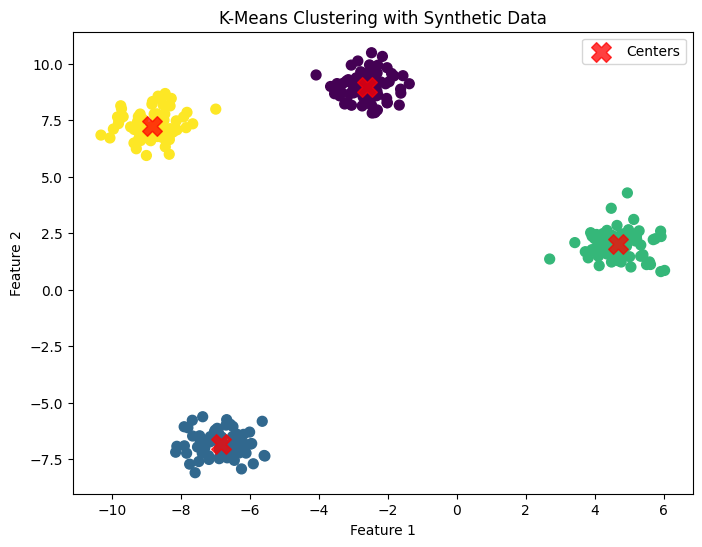

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centers')

plt.title("K-Means Clustering with Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

(Include your Python code and output in the code box below.)

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=1.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

n_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
print(f"Number of clusters found (excluding noise): {n_clusters}")

Number of clusters found (excluding noise): 0


Question 8: Generate moon-shaped synthetic data using make_moon(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

(Include your Python code and output in the code box below.)

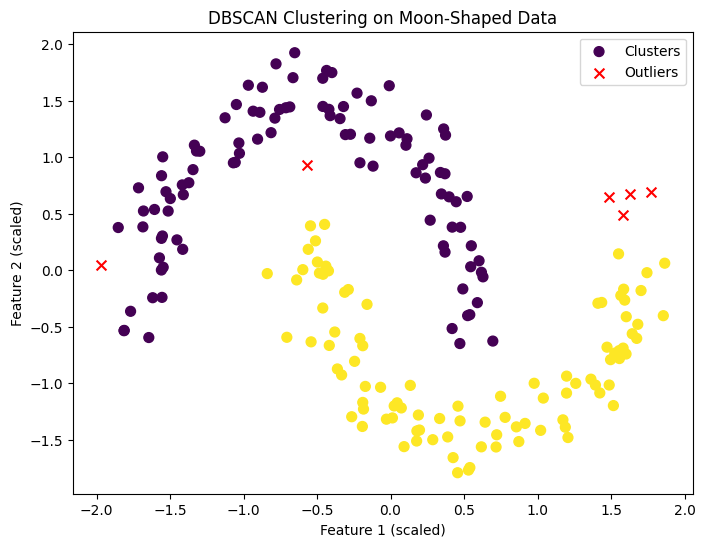

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X, y_true = make_moons(n_samples=200, noise=0.1, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))

outliers = y_dbscan == -1
clusters = y_dbscan != -1

plt.scatter(X_scaled[clusters, 0], X_scaled[clusters, 1], c=y_dbscan[clusters], cmap='viridis', s=50, label='Clusters')

plt.scatter(X_scaled[outliers, 0], X_scaled[outliers, 1], c='red', s=50, marker='x', label='Outliers')

plt.title("DBSCAN Clustering on Moon-Shaped Data")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.show()

Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.

(Include your Python code and output in the code box below.)

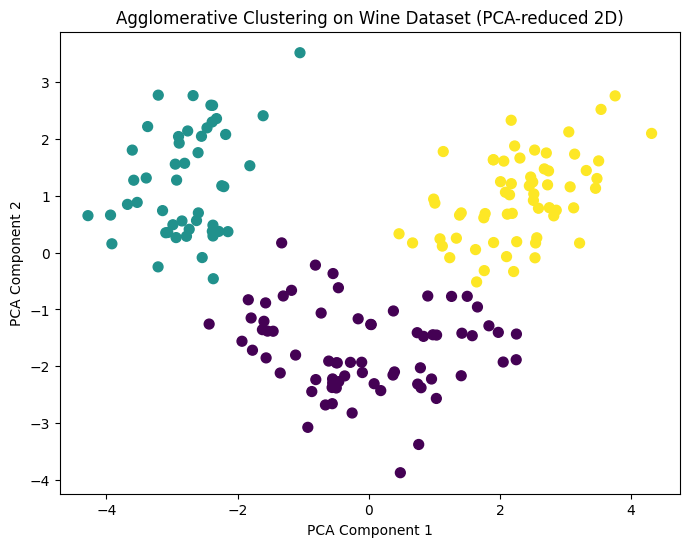

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

wine = load_wine()
X = wine.data
y_true = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

agglo = AgglomerativeClustering(n_clusters=3)
y_agglo = agglo.fit_predict(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_agglo, cmap='viridis', s=50)
plt.title("Agglomerative Clustering on Wine Dataset (PCA-reduced 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories. Describe your real-world data science workflow using clustering:

● Which clustering algorithm(s) would you use and why?

● How would you preprocess the data (missing values, scaling)?

● How would you determine the number of clusters?

● How would the marketing team benefit from your clustering analysis?

(Include your Python code and output in the code box below.

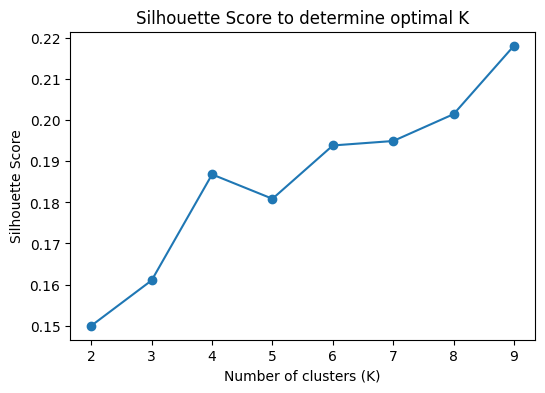

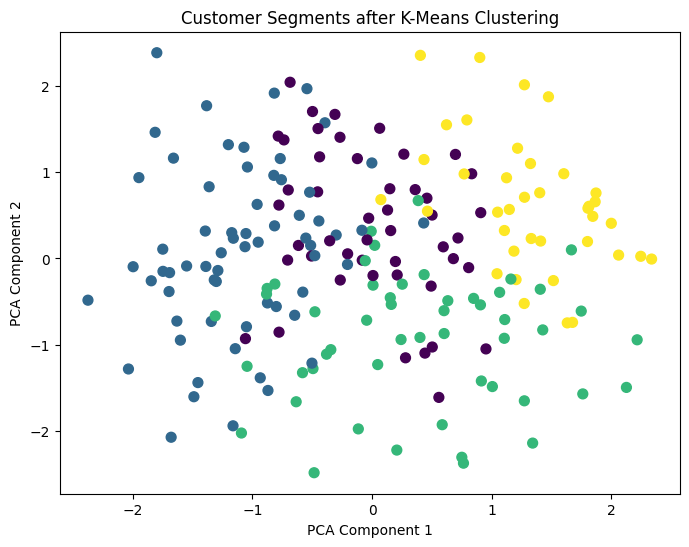

               Age  Annual_Income  Purchase_Electronics  Purchase_Clothing
Cluster                                                                   
0        39.574468   59002.510638             10.659574          10.404255
1        47.031250   57936.984375              9.562500           9.296875
2        31.666667   82523.745098              9.019608           3.196078
3        57.894737   81385.657895              9.026316           3.789474


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import numpy as np
np.random.seed(42)
df = pd.DataFrame({
    'Age': np.random.randint(18, 70, 200),
    'Annual_Income': np.random.randint(20000, 120000, 200),
    'Purchase_Electronics': np.random.randint(0, 20, 200),
    'Purchase_Clothing': np.random.randint(0, 15, 200),
    'Gender': np.random.choice(['Male','Female'], 200)
})

num_cols = ['Age', 'Annual_Income', 'Purchase_Electronics', 'Purchase_Clothing']
cat_cols = ['Gender']

num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

sil_scores = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score to determine optimal K")
plt.show()

optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='viridis', s=50)
plt.title("Customer Segments after K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

cluster_summary = df.drop(columns=cat_cols).groupby('Cluster').mean()
print(cluster_summary)